In [1]:
!pwd
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys
sys.executable

/c/Users/81908/jupyter_notebook/stock_work/03.stock_repo/stock_lending_loan


'C:\\Users\\81908\\anaconda3\\envs\\stock\\python.exe'

# 株価と貸株残高(個人投資家の貸株=信用取引の数)、融資残高（個人投資家の空売りの数）の関係性確認

<br>

### marketspeedの左上の「個別銘柄」 → 銘柄指定=9434 ソフトバンク → 右下の「市況」 → 右上の「時系列」選び、期間して、「↓」マーク押すとその銘柄の株価データのcsvファイルダウンロードできる
- このcsvを使って確認する

<br>

### 株価上がると（空売りで売ってる人は損するから）融資残高は下がり、株価下がると（信用取引で買ってる人損するから）貸株残高下がるはず

<br>

### **ソフトバンク 2019/06から2020/06で、翌日始値-当日終値、翌日高値-当日終値、翌日安値-当日終値について、貸株残高:当日-前日、融資残高:当日-前日 との相関係数を確認したが値0.1程度**
### **→相関あまり見られず**

,始値,高値,安値,終値,前日比,出来高,売買代金,貸株残高,融資残高,貸借倍率,逆日歩,特別空売り料,5DMA,25DMA,75DMA,100DMA,200DMA,5DVMA,25DVMA,75DVMA
日付,,,,,,,,,,,,,,,,,,,,
2019/06/05,1440.0,1443.5,1423.0,1431.0,-2.0,9148400.0,13121647.0,1630600.0,193300.0,0.12,0.05,NaN,1423.2,1403.38,1342.21,1355.71,NaN,7136860.0,13962072.0,11735797.0
2019/06/06,1438.5,1441.0,1428.0,1429.5,-1.5,5353600.0,7675280.0,1625700.0,188400.0,0.12,0.00,NaN,1425.6,1406.96,1344.05,1356.01,NaN,7096600.0,13784712.0,11680414.0
2019/06/07,1436.5,1437.5,1421.5,1430.0,0.5,4327200.0,6181733.0,1588100.0,157100.0,0.10,0.05,NaN,1429.6,1410.90,1345.82,1356.12,NaN,6517880.0,12847712.0,11630112.0
2019/06/10,1418.0,1420.0,1400.5,1406.0,-24.0,10330000.0,14549387.0,1525700.0,472900.0,0.31,0.00,NaN,1425.9,1414.66,1347.43,1355.72,NaN,7256500.0,12904516.0,11656626.0
2019/06/11,1416.0,1424.0,1414.0,1419.5,13.5,7102200.0,10079688.0,1724300.0,230500.0,0.13,0.05,NaN,1423.2,1419.32,1349.17,1355.63,NaN,7252280.0,12677528.0,11648038.0


,始値,高値,安値,終値,前日比,出来高,売買代金,貸株残高,融資残高,貸借倍率,逆日歩,特別空売り料,5DMA,25DMA,75DMA,100DMA,200DMA,5DVMA,25DVMA,75DVMA
日付,,,,,,,,,,,,,,,,,,,,
2020/06/22,1376.5,1388.5,1374.5,1381.0,3.0,5954800.0,8225988.0,6800.0,278300.0,40.93,NaN,NaN,1374.2,1366.48,1399.57,1421.36,1454.14,8459880.0,13958580.0,12326382.0
2020/06/23,1387.0,1408.0,1381.5,1403.0,22.0,10168100.0,14203058.0,48200.0,254500.0,5.28,NaN,NaN,1380.7,1366.48,1399.23,1420.56,1453.57,8498280.0,13886440.0,12318810.0
2020/06/24,1404.0,1407.0,1388.0,1396.0,-7.0,6077800.0,8487848.0,27100.0,215600.0,7.96,NaN,NaN,1384.2,1366.88,1398.23,1419.73,1453.03,8270780.0,13795888.0,12221470.0
2020/06/25,1386.0,1391.5,1374.5,1382.5,-13.5,8500900.0,11745172.0,179700.0,224200.0,1.25,NaN,NaN,1388.1,1367.18,1396.79,1418.81,1452.41,8283380.0,13948040.0,12191598.0
2020/06/26,1387.5,1392.5,1380.5,1392.0,9.5,5843200.0,8111847.0,184600.0,200500.0,1.09,NaN,NaN,1390.9,1370.10,1395.83,1417.88,1451.90,7308960.0,12077064.0,12091157.0


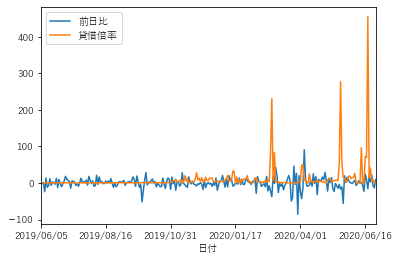

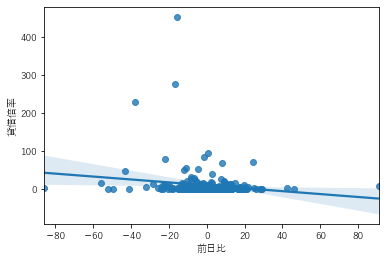

相関係数: -0.16040392390846378


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Yu Gothic'   # Yu Gothic指定すれば日本語出せる
import seaborn as sns

df = pd.read_csv(r'softbank_markerspeed.csv', 
                 index_col='日付', 
                 na_values=['','NA','-'])
#print(df.columns)
#print(df.dtypes)
#display(df.head())

for col in df.columns:
    _dtype = df[col].dtype
    if _dtype != 'float64':
        df[col] = df[col].apply(lambda x: x.replace(",", "") if type(x) is str else float(x))
df = df.astype('float64')
df = df.sort_index()
display(df.head())
display(df.tail())

# plot
df[['前日比', '貸借倍率']].plot()
plt.show()

sns.regplot(x=df['前日比'], y=df['貸借倍率'])
plt.show()

print('相関係数:', df['前日比'].corr(df['貸借倍率']))

,翌日始値-当日終値,翌日高値-当日終値,翌日安値-当日終値,貸株残高:当日-前日,融資残高:当日-前日
0,7.0,8.0,-8.0,-4900.0,-4900.0
1,-12.0,-10.0,-29.5,-37600.0,-31300.0
2,10.0,18.0,8.0,-62400.0,315800.0
3,-6.5,-3.0,-13.5,198600.0,-242400.0
4,0.5,4.5,-10.5,21200.0,231900.0


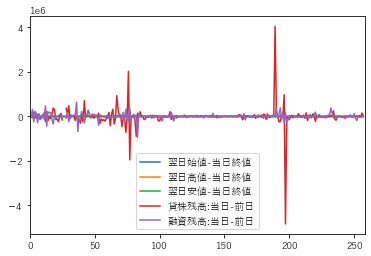

翌日始値-当日終値 vs. 貸株残高:当日-前日は相関係数0.1未満。。。

相関係数: 0.16825980426114123


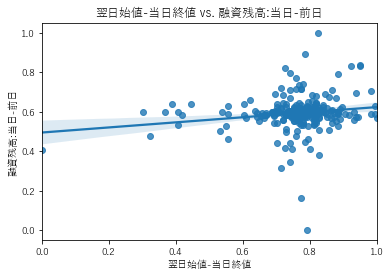

相関係数: -0.10143979963820268


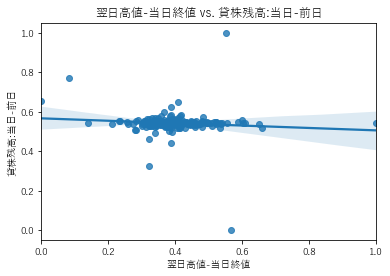

相関係数: 0.18306680343343806


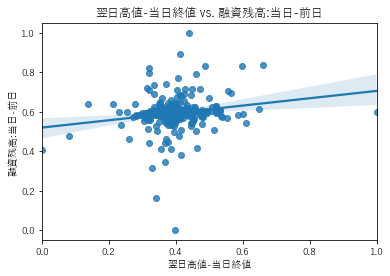

翌日安値-当日終値 vs. 貸株残高:当日-前日は相関係数0.1未満。。。

相関係数: 0.13313690622844984


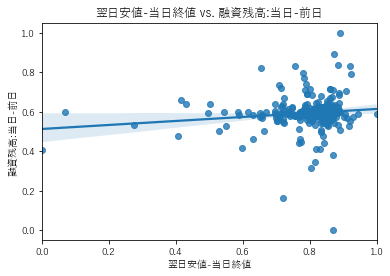

In [3]:
strat = df['始値']
high = df['高値']
low = df['安値']
end = df['終値']
kasi = df['貸株残高']
yushi = df['融資残高']

strat_end_sa = df['始値'].shift(-2).values - df['終値'].shift(-1).values
high_end_sa = df['高値'].shift(-2).values - df['終値'].shift(-1).values
low_end_sa = df['安値'].shift(-2).values - df['終値'].shift(-1).values
kasi_sa = df['貸株残高'].shift(-1).values - df['貸株残高'].values
yushi_sa = df['融資残高'].shift(-1).values - df['融資残高'].values

df_sa = pd.DataFrame({'翌日始値-当日終値': strat_end_sa, 
                      '翌日高値-当日終値': high_end_sa, 
                      '翌日安値-当日終値': low_end_sa, 
                      '貸株残高:当日-前日': kasi_sa, 
                      '融資残高:当日-前日': yushi_sa})
display(df_sa.head())

# plot
df_sa.plot()
plt.show()

def _plot(df, col1: str, col2: str, is_scaler=True):
    
    if is_scaler:
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler() 
        result = scaler.fit_transform(df[[col1, col2]])
        df[col1] = [x[0] for x in result]
        df[col2] = [x[1] for x in result]
    
    _corr = df[col1].corr(df[col2])
    if np.abs(_corr) > 0.1:
        print('相関係数:', _corr)
        sns.regplot(x=df[col1], y=df[col2])
        plt.title(col1 + ' vs. ' + col2)
        plt.show()
    else:
        print(col1 + ' vs. ' + col2 + 'は相関係数0.1未満。。。\n')
    
    
_plot(df_sa, '翌日始値-当日終値', '貸株残高:当日-前日')
_plot(df_sa, '翌日始値-当日終値', '融資残高:当日-前日')

_plot(df_sa, '翌日高値-当日終値', '貸株残高:当日-前日')
_plot(df_sa, '翌日高値-当日終値', '融資残高:当日-前日')

_plot(df_sa, '翌日安値-当日終値', '貸株残高:当日-前日')
_plot(df_sa, '翌日安値-当日終値', '融資残高:当日-前日')